Import needed packages for this task

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Importing data

In [3]:
president_county_candidate = pd.read_csv('Data/president_county_candidate.csv')
president_county_candidate.tail()

,state,county,candidate,party,total_votes,won
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False
32176,Arizona,Mohave County,Write-ins,WRI,37,False


Check descriptive statitistics of total_votes for candidate

In [4]:
president_county_candidate.describe()

,total_votes
count,3.217700e+04
mean,4.960321e+03
std,3.581577e+04
min,0.000000e+00
25%,3.000000e+00
50%,3.400000e+01
75%,7.450000e+02
max,3.028885e+06


In [49]:
president_county_candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32177 entries, 0 to 32176
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        32177 non-null  object
 1   county       32177 non-null  object
 2   candidate    32177 non-null  object
 3   party        32177 non-null  object
 4   total_votes  32177 non-null  int64 
 5   won          32177 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.3+ MB


Cleaning Data

Check if there is some null values

In [15]:
president_county_candidate.isnull().sum()

state          0
county         0
candidate      0
party          0
total_votes    0
won            0
dtype: int64

as there is no missing data, now check if there is some dublicates

In [16]:
president_county_candidate.duplicated().sum()

0

Also, there is no dublicates so we could check some graphical data visualization. But first we make some groups to see if there is significant differences between states county and won candidates names

In [9]:
pd.pivot_table(president_county_candidate, index= ["state"], columns= "party", values = "total_votes")


party,ALI,APV,ASP,BAR,BFP,BMP,CST,DEM,GOP,GRN,...,OTH,PRG,PRO,PSL,REP,SEP,SWP,UNA,UTY,WRI
state,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12681.313433,NaN,NaN,...,NaN,NaN,NaN,NaN,21509.970149,NaN,NaN,NaN,NaN,109.134328
Alaska,7.950000,NaN,NaN,NaN,NaN,NaN,28.175000,3835.125000,NaN,66.825000,...,NaN,NaN,NaN,NaN,4747.300000,NaN,NaN,NaN,NaN,877.179487
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111476.200000,NaN,NaN,...,NaN,NaN,NaN,NaN,110779.066667,NaN,NaN,NaN,NaN,135.466667
Arkansas,17.613333,NaN,22.840000,NaN,NaN,NaN,28.106667,5652.426667,NaN,39.733333,...,NaN,NaN,37.493333,17.813333,10141.960000,NaN,NaN,NaN,NaN,NaN
California,1037.155172,NaN,NaN,NaN,NaN,NaN,NaN,191547.655172,NaN,1396.982759,...,NaN,NaN,NaN,879.931034,103551.051724,NaN,NaN,NaN,NaN,5.333333
Colorado,9.937500,5.546875,39.312500,NaN,NaN,NaN,79.078125,28193.000000,NaN,140.406250,...,NaN,5.921875,8.875000,16.171875,21321.984375,3.0625,5.531250,6.687500,42.65625,0.000000
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6394.556213,NaN,44.603550,...,NaN,NaN,NaN,NaN,4232.491124,NaN,NaN,NaN,NaN,3.218935
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98756.000000,NaN,713.000000,...,NaN,NaN,NaN,NaN,66867.666667,NaN,NaN,NaN,NaN,NaN
District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39665.375000,NaN,215.750000,...,NaN,NaN,NaN,106.875000,2323.250000,NaN,NaN,NaN,NaN,392.125000


As it was a lot diffrent parties in different state we could not use this uproach and moving to another one.

In [14]:
df =  president_county_candidate[president_county_candidate.state == "Utah"]
df[president_county_candidate.county == "Beaver County"]


,state,county,candidate,party,total_votes,won
20670,Utah,Beaver County,Donald Trump,REP,2695,True
20671,Utah,Beaver County,Joe Biden,DEM,357,False
20672,Utah,Beaver County,Jo Jorgensen,LIB,23,False
20673,Utah,Beaver County,Kanye West,IND,7,False
20674,Utah,Beaver County,Howie Hawkins,GRN,6,False
20675,Utah,Beaver County,Don Blankenship,CST,4,False
20676,Utah,Beaver County,Gloria La Riva,PSL,4,False
20677,Utah,Beaver County,Joe McHugh,UNA,3,False
20678,Utah,Beaver County,Brock Pierce,IND,1,False


Now calculate each state state votes to calculate influence rate of state

In [16]:
state_county_votes = president_county_candidate.groupby(["state", "county"]).sum()
state_county_votes

total_votes  won
state   county                             
Alabama Autauga County           27770    1
        Baldwin County          109679    1
        Barbour County           10518    1
        Bibb County               9595    1
        Blount County            27588    1
...                                ...  ...
Wyoming Sweetwater County        16603    1
        Teton County             14677    1
        Uinta County              9402    1
        Washakie County           4012    1
        Weston County             3542    1

[4633 rows x 2 columns]

In [28]:
n = state_county_votes.reset_index()
n = n.iloc[: ,:-1]
n = n.rename(columns={"total_votes":"state_county_votes"})
n.tail(10)

,state,county,state_county_votes
4623,Wyoming,Niobrara County,1308
4624,Wyoming,Park County,16717
4625,Wyoming,Platte County,4923
4626,Wyoming,Sheridan County,16428
4627,Wyoming,Sublette County,4970
4628,Wyoming,Sweetwater County,16603
4629,Wyoming,Teton County,14677
4630,Wyoming,Uinta County,9402
4631,Wyoming,Washakie County,4012
4632,Wyoming,Weston County,3542


In [30]:
state_votes = n.groupby(["state"]).sum()
state_votes.head(20)

,state_county_votes
state,
Alabama,2323304
Alaska,391346
Arizona,3387326
Arkansas,1219069
California,17495906
Colorado,3256953
Connecticut,1824280
Delaware,504010
District of Columbia,344356


In [31]:
m = state_votes.reset_index()
m = m.rename(columns={"state_county_votes":"state_votes"})
m.tail(10)

,state,state_votes
41,South Dakota,422609
42,Tennessee,3054534
43,Texas,11317911
44,Utah,1488289
45,Vermont,367428
46,Virginia,4460524
47,Washington,4087631
48,West Virginia,794652
49,Wisconsin,3297352
50,Wyoming,276765


In [32]:
i = m["state_votes"].sum()
i

159608237

Now add calculated sums in order to calculate indexis

In [40]:
merged_data =  (president_county_candidate.join(m.set_index("state"), on ="state")).join(n.set_index(["state", "county"]), on= ["state", "county"])
merged_data.head(15)

,state,county,candidate,party,total_votes,won,state_votes,state_county_votes
0,Delaware,Kent County,Joe Biden,DEM,44552,True,504010,87025
1,Delaware,Kent County,Donald Trump,REP,41009,False,504010,87025
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,504010,87025
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,504010,87025
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,504010,287633
5,Delaware,New Castle County,Donald Trump,REP,88364,False,504010,287633
6,Delaware,New Castle County,Jo Jorgensen,LIB,2953,False,504010,287633
7,Delaware,New Castle County,Howie Hawkins,GRN,1282,False,504010,287633
8,Delaware,Sussex County,Donald Trump,REP,71230,True,504010,129352
9,Delaware,Sussex County,Joe Biden,DEM,56682,False,504010,129352


In [42]:
merged_data["state_weight"] = merged_data["state_votes"]/i
merged_data["county_weight"] = merged_data["state_county_votes"]/merged_data["state_votes"]
merged_data.head(15)

,state,county,candidate,party,total_votes,won,state_votes,state_county_votes,state_weight,county_weight
0,Delaware,Kent County,Joe Biden,DEM,44552,True,504010,87025,0.003158,0.172665
1,Delaware,Kent County,Donald Trump,REP,41009,False,504010,87025,0.003158,0.172665
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,504010,87025,0.003158,0.172665
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,504010,87025,0.003158,0.172665
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,504010,287633,0.003158,0.570689
5,Delaware,New Castle County,Donald Trump,REP,88364,False,504010,287633,0.003158,0.570689
6,Delaware,New Castle County,Jo Jorgensen,LIB,2953,False,504010,287633,0.003158,0.570689
7,Delaware,New Castle County,Howie Hawkins,GRN,1282,False,504010,287633,0.003158,0.570689
8,Delaware,Sussex County,Donald Trump,REP,71230,True,504010,129352,0.003158,0.256646
9,Delaware,Sussex County,Joe Biden,DEM,56682,False,504010,129352,0.003158,0.256646


<Figure size 1000x800 with 0 Axes>

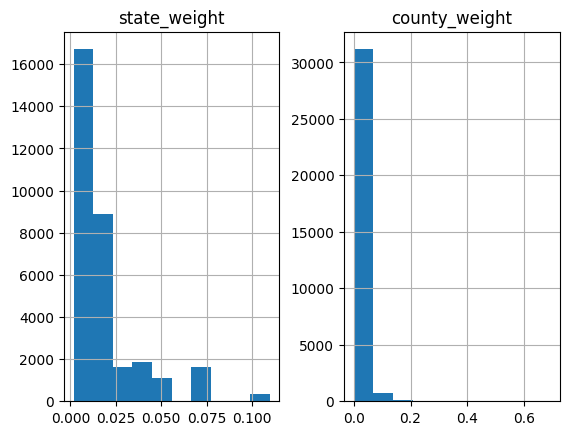

In [52]:
fig = plt.figure(figsize = (10,8))
merged_data.hist(column=["state_weight", "county_weight"])
plt.show()

Null hypothesis Biden wins in more populated states and districsts (has bigger weight)

so we rearange our data set, leaving only won candidates

In [60]:
model_data = merged_data[merged_data["won"] == 1]
model_data.tail(15)

,state,county,candidate,party,total_votes,won,state_votes,state_county_votes,state_weight,county_weight
32117,Arizona,Navajo County,Donald Trump,REP,27657,True,3387326,51783,0.021223,0.015287
32121,Arizona,Pima County,Joe Biden,DEM,304981,True,3387326,520735,0.021223,0.153730
32125,Arizona,Pinal County,Donald Trump,REP,107077,True,3387326,185037,0.021223,0.054626
32129,Arizona,Santa Cruz County,Joe Biden,DEM,13138,True,3387326,19561,0.021223,0.005775
32133,Arizona,Yavapai County,Donald Trump,REP,91527,True,3387326,143280,0.021223,0.042299
32137,Arizona,Yuma County,Donald Trump,REP,36534,True,3387326,69926,0.021223,0.020643
32141,Arizona,Apache County,Joe Biden,DEM,23293,True,3387326,35183,0.021223,0.010387
32145,Arizona,Cochise County,Donald Trump,REP,35557,True,3387326,60473,0.021223,0.017853
32149,Arizona,Coconino County,Joe Biden,DEM,44698,True,3387326,73346,0.021223,0.021653
32153,Arizona,Gila County,Donald Trump,REP,18377,True,3387326,27678,0.021223,0.008171


Check how many diustinct parties/candidates left in voting counties

In [61]:
model_data.party.value_counts().reset_index()

,index,party
0,REP,3219
1,DEM,1410
2,WRI,3
3,LIB,1


In [63]:
model_data.candidate.value_counts().reset_index()

,index,candidate
0,Donald Trump,3219
1,Joe Biden,1410
2,Write-ins,3
3,Jo Jorgensen,1


Split data to train and test data

In [65]:
y = model_data["candidate"]
columns = ["state_weight", "county_weight"]
x = model_data[columns]

In [66]:
x.head()

,state_weight,county_weight
0,0.003158,0.172665
4,0.003158,0.570689
8,0.003158,0.256646
12,0.002158,0.121040
19,0.002158,0.095485


In [67]:
y.head()

0        Joe Biden
4        Joe Biden
8     Donald Trump
12       Joe Biden
19       Joe Biden
Name: candidate, dtype: object

Splitting data to train and test datasets

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Train and Predict model

In [72]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

Predicting values

In [73]:
y_pred = model.predict(x_test)
y_pred

array(['Joe Biden', 'Donald Trump', 'Joe Biden', ..., 'Donald Trump',
       'Joe Biden', 'Donald Trump'], dtype=object)

Evaluating accuracy of the model

In [75]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.7479499352611135

As value is quite close to 1. It could be stated that model is quite good describes data and null hypothesis that Biden wons more populated states and counties is TRUE